In [137]:
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
# Historial de reproducciones desde 2014 hasta julio de 2024
url = "https://raw.githubusercontent.com/NelbaBarreto/spotify-streaming-history-audio/refs/heads/main/data/merged_streaming_history_unfiltered.csv"
df = pd.read_csv(url)

In [139]:
df.shape

(130869, 9)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130869 entries, 0 to 130868
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 130869 non-null  object
 1   ms_played                          130869 non-null  int64 
 2   master_metadata_track_name         129568 non-null  object
 3   master_metadata_album_artist_name  129568 non-null  object
 4   master_metadata_album_album_name   129568 non-null  object
 5   spotify_track_uri                  129568 non-null  object
 6   episode_show_name                  1098 non-null    object
 7   spotify_episode_uri                1098 non-null    object
 8   episode_name                       1098 non-null    object
dtypes: int64(1), object(8)
memory usage: 9.0+ MB


In [141]:
df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_show_name,spotify_episode_uri,episode_name
0,2014-03-21T18:23:56Z,30232,Stay Schemin,Rick Ross,Stay Schemin,spotify:track:3ejrk4i0LWIofaaBEmwX0A,NaN,NaN,NaN
1,2014-03-21T18:24:39Z,35944,Hall of Fame (feat. will.i.am),The Script,#3 Deluxe Version,spotify:track:7wMq5n8mYSKlQIGECKUgTX,NaN,NaN,NaN
2,2014-03-21T18:24:40Z,1996,Counting Stars - Tribute to OneRepublic,Counting Stars,Counting Stars - Tribute to OneRepublic,spotify:track:1xWlMqU3P89NqmgaeIw8Ne,NaN,NaN,NaN
3,2014-03-21T18:26:21Z,1532,Counting Stars (Cover),Counting Stars,Counting Stars (Cover),spotify:track:2LaBpElKGaQcRVjckdoCV0,NaN,NaN,NaN
4,2014-04-09T18:18:04Z,25681,Fitzpleasure,alt-J,An Awesome Wave,spotify:track:6gP9gjBR6KQ4T2pw9CLtkj,NaN,NaN,NaN


In [142]:
# Obtener datos de horas escuchadas
df["hours_played"] = df["ms_played"] / (1000 * 60 * 60)

### Obtener todos los podcasts

In [143]:
# Agrupar podcasts por nombre del show y sumar la cantidad de horas escuchadas
podcast_data = df[~df["episode_show_name"].isnull()].groupby("episode_show_name")["hours_played"].sum().sort_values(ascending=False).reset_index()

In [144]:
# Obtener el top 15 de podcast más escuchados
podcast_data.sort_values(by="hours_played", ascending=False).head(15)

,episode_show_name,hours_played
0,Serial Killers,197.802610
1,Crimes of Passion,37.671223
2,Lecturas de Yamil Cuéllar,37.577249
3,Female Criminals,20.650111
4,Strange Animals Podcast,2.625601
5,Curiosidades de la Historia National Geographic,2.292987
6,LECTURAS de Yamil Cuéllar,1.288775
7,1984 - George Orwell - Bibliófilos,0.829781
8,Medical Murders,0.698908
9,Species,0.694516


### Obtener todas las canciones

In [145]:
# Agrupar canciones por nombre del artista y nombre de la canción y sumar la cantidad de milisegundos escuchados
songs_data = df[df["episode_show_name"].isnull()]
songs_data_grouped = songs_data.groupby(["master_metadata_track_name", "master_metadata_album_artist_name"])["hours_played"].sum().sort_values(ascending=False).reset_index()

In [146]:
# Obtener el top 15 de canciones más escuchadass
songs_data_grouped.sort_values(by="hours_played", ascending=False).head(15)

,master_metadata_track_name,master_metadata_album_artist_name,hours_played
0,Swing Lynn,Harmless,29.932435
1,Madness,Muse,26.989094
2,Lamb's Wool,Foster The People,23.807069
3,Vertigo,Mini Mansions,22.524123
4,Spiralling,Keane,19.908256
5,Lovers Rock,TV Girl,19.552912
6,Nothing In My Way,Keane,19.205527
7,Smile Like You Mean It,The Killers,16.993071
8,Disconnected,Keane,16.834516
9,Breakeven,The Script,16.341912


<hr/>

In [147]:
# Obtener artistas más escuchados
top_artists = (
    songs_data.groupby("master_metadata_album_artist_name")["hours_played"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
).reset_index()
top_artists

,master_metadata_album_artist_name,hours_played
0,Keane,598.830894
1,One Direction,165.195221
2,Dua Lipa,160.161350
3,The Script,151.991997
4,The Killers,127.764586
5,The Strokes,126.867132
6,Little Mix,103.905067
7,Coldplay,101.171826
8,Doja Cat,80.877365
9,Ariana Grande,75.002474


In [148]:
# Obtener albumes más escuchados
top_albums  = (
    songs_data.groupby(["master_metadata_album_album_name", "master_metadata_album_artist_name"])["hours_played"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
).reset_index()
top_albums


,master_metadata_album_album_name,master_metadata_album_artist_name,hours_played
0,Cause And Effect,Keane,106.289197
1,Under The Iron Sea,Keane,95.512299
2,Hopes And Fears,Keane,95.036959
3,Future Nostalgia,Dua Lipa,75.368545
4,Hot Fuss,The Killers,71.460221
5,Strangeland,Keane,68.835804
6,Perfect Symmetry,Keane,56.045654
7,The Best Of Keane - Deluxe Edition,Keane,55.432710
8,The Script,The Script,51.390543
9,Dua Lipa,Dua Lipa,46.126958


In [149]:
songs_data = songs_data.copy()

songs_data["year"] = pd.to_datetime(df["ts"]).dt.year
songs_data["month"] = pd.to_datetime(df["ts"]).dt.month
songs_data["day"] = pd.to_datetime(df["ts"]).dt.day
songs_data["hour"] = pd.to_datetime(df["ts"]).dt.hour

# Reproducciones por año
plays_per_year = songs_data.groupby("year")["hours_played"].sum()
plays_per_year

,hours_played
year,
2014,5.860688
2015,21.527041
2016,78.606623
2017,18.065112
2018,165.591497
2019,353.089366
2020,856.812907
2021,1300.218139
2022,1185.469613


La mayor cantidad de reproducciones fue en el año 2021.

In [150]:
plays_per_month = songs_data[songs_data["year"] == 2021].groupby("month")["hours_played"].sum()
plays_per_month

,hours_played
month,
1,57.125571
2,83.522691
3,66.445894
4,63.249167
5,84.383535
6,100.758934
7,77.742002
8,111.125226
9,144.752134


La mayor cantidad de reproducciones fue en diciembre.

In [151]:
# Filtrar solo los datos para diciembre del año 2021
songs_2021 = songs_data[(songs_data["year"] == 2021) & (songs_data["month"] == 12)]
songs_2021.groupby(["master_metadata_album_artist_name", "master_metadata_track_name"])["hours_played"].sum().sort_values(ascending=False).head(10)

master_metadata_album_artist_name  master_metadata_track_name
Harmless                           Swing Lynn                    7.894730
TV Girl                            Lovers Rock                   4.173617
Dr. Dog                            Where'd All the Time Go?      3.378672
TV Girl                            Not Allowed                   3.294204
                                   Hate Yourself                 2.865669
Foster The People                  Lamb's Wool                   1.865933
Peachy!                            Falling for U                 1.707192
Dayglow                            Can I Call You Tonight?       1.693031
Declan McKenna                     Why Do You Feel So Down       1.561859
Doja Cat                           Say So                        1.552348
Name: hours_played, dtype: float64

Obviamente diciembre de 2021 es mi top de escucha y obviamente este es mi top de canciones.

In [152]:
# Filtrar solo los datos para novimebre del año 2021
songs_2021 = songs_data[(songs_data["year"] == 2021) & (songs_data["month"] == 11)]
songs_2021.groupby(["master_metadata_album_artist_name", "master_metadata_track_name"])["hours_played"].sum().sort_values(ascending=False).head(10)

,,hours_played
master_metadata_album_artist_name,master_metadata_track_name,
Foster The People,Lamb's Wool,5.274514
Doja Cat,Say So,2.624627
The Strokes,Selfless,2.129502
L8LOOMER,Right Side (Feat. Doja Cat),2.052470
The Strokes,Red Light,1.736650
THE ANXIETY,Meet Me At Our Spot,1.582088
El Mató a un Policía Motorizado,El Tesoro,1.521367
Andrés Calamaro,Cuando no estás,1.412889
Los Abuelos De La Nada,Mil Horas,1.130874


In [153]:
# Obtener la hora en la que más escucho música (excluyendo el 2024 porque está incompleto)
plays_per_hour = songs_data[songs_data["year"] != 2024].groupby("hour")["hours_played"].sum()
plays_per_hour

,hours_played
hour,
0,125.401524
1,119.157300
2,97.017191
3,76.260381
4,46.166289
5,28.588726
6,14.932017
7,13.209184
8,22.690815


In [154]:
plays_per_hour.idxmax()

14

La hora que más escuché música fue las 14.

In [155]:
df_abril_2024 = songs_data[((songs_data["hour"] >= 0) & (songs_data["hour"] <= 4)) & (songs_data["month"] == 4) & (songs_data["year"] == 2024)].sort_values(by="hour", ascending=False)
df_abril_2024

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_show_name,spotify_episode_uri,episode_name,hours_played,year,month,day,hour
122298,2024-04-18T04:39:08Z,1686,Strip (feat. Sharaya J),Little Mix,LM5 (Deluxe),spotify:track:6XkEw1h2Hq4fGnSm0JuSIs,NaN,NaN,NaN,0.000468,2024,4,18,4
122306,2024-04-18T04:48:11Z,175410,Used To Be My Girl,The Last Shadow Puppets,Everything You've Come To Expect,spotify:track:4QzJg2N57KhY0tDVmEVIgU,NaN,NaN,NaN,0.048725,2024,4,18,4
122303,2024-04-18T04:41:16Z,4984,"Andy, You're A Star",The Killers,Hot Fuss,spotify:track:4MHGXPNVMx9tp8WEaex15z,NaN,NaN,NaN,0.001384,2024,4,18,4
122302,2024-04-18T04:41:11Z,14890,Freakin' Out On the Interstate,Briston Maroney,Carnival,spotify:track:6Fqf0OTfB9VPfYk2HfBhPn,NaN,NaN,NaN,0.004136,2024,4,18,4
122301,2024-04-18T04:40:56Z,104083,Best Friend,Foster The People,Supermodel,spotify:track:7tvOve5IkjYenvqScZ75iQ,NaN,NaN,NaN,0.028912,2024,4,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122027,2024-04-16T00:42:20Z,199849,What Lovers Do (feat. SZA),Maroon 5,Red Pill Blues,spotify:track:0GxQ1A5L9xnMOytbP6eKBG,NaN,NaN,NaN,0.055514,2024,4,16,0
122028,2024-04-16T00:45:40Z,199849,What Lovers Do (feat. SZA),Maroon 5,Red Pill Blues,spotify:track:0GxQ1A5L9xnMOytbP6eKBG,NaN,NaN,NaN,0.055514,2024,4,16,0
122029,2024-04-16T00:46:37Z,54481,What Lovers Do (feat. SZA),Maroon 5,Red Pill Blues,spotify:track:0GxQ1A5L9xnMOytbP6eKBG,NaN,NaN,NaN,0.015134,2024,4,16,0
122030,2024-04-16T00:46:42Z,5100,Rock Me - Live Version from The Motion Picture...,One Direction,Midnight Memories,spotify:track:556dq53fPiJ1aiXRSXI2bA,NaN,NaN,NaN,0.001417,2024,4,16,0


In [156]:
df_abril_2024.groupby(["day"])["hours_played"].sum().sort_values(ascending=False)

,hours_played
day,
21,1.776595
16,0.626444
18,0.583131
28,0.509623
25,0.446409
24,0.378826
4,0.357369
3,0.218547
13,0.215401


In [162]:
df_abril_2024[df_abril_2024["day"] == 21].sort_values(by="hour", ascending=False)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_show_name,spotify_episode_uri,episode_name,hours_played,year,month,day,hour
122538,2024-04-21T04:25:43Z,227023,Hysteria,Muse,Absolution,spotify:track:0knbMPVHpFbsx38pLoYSRs,NaN,NaN,NaN,0.063062,2024,4,21,4
122535,2024-04-21T04:13:49Z,244728,The Way I Feel,Keane,The Way I Feel,spotify:track:5hJ2KMM0FnuOOmfYCcB9IU,NaN,NaN,NaN,0.067980,2024,4,21,4
122539,2024-04-21T04:29:31Z,227080,Obstacle 2 - 2012 Remaster,Interpol,Turn On The Bright Lights,spotify:track:0frNDpHAHKEqjkcEp9skcT,NaN,NaN,NaN,0.063078,2024,4,21,4
122537,2024-04-21T04:21:55Z,274088,Sweet Emotion,Aerosmith,Toys In The Attic,spotify:track:73TxYZd0lBCVRrHawrAglA,NaN,NaN,NaN,0.076136,2024,4,21,4
122536,2024-04-21T04:17:20Z,211360,Focus,Ariana Grande,Focus,spotify:track:1cdzfFjEbUbgTm5nv3FgXR,NaN,NaN,NaN,0.058711,2024,4,21,4
122540,2024-04-21T04:49:29Z,61518,What You Know,Two Door Cinema Club,Tourist History,spotify:track:3GBApU0NuzH4hKZq4NOSdA,NaN,NaN,NaN,0.017088,2024,4,21,4
122534,2024-04-21T04:09:44Z,309053,The Adults Are Talking,The Strokes,The New Abnormal,spotify:track:5ruzrDWcT0vuJIOMW7gMnW,NaN,NaN,NaN,0.085848,2024,4,21,4
122532,2024-04-21T04:01:09Z,244880,Sunday Morning,Maroon 5,Songs About Jane: 10th Anniversary Edition,spotify:track:5qII2n90lVdPDcgXEEVHNy,NaN,NaN,NaN,0.068022,2024,4,21,4
122533,2024-04-21T04:04:34Z,204726,My My My!,Troye Sivan,Bloom,spotify:track:4NiehSBQthimPzRsVeOgCT,NaN,NaN,NaN,0.056868,2024,4,21,4
122531,2024-04-21T03:57:04Z,304080,Stay Out Of Trouble,Kings of Convenience,Riot On An Empty Street,spotify:track:7JnVOxOCeivkTaozwMqtx6,NaN,NaN,NaN,0.084467,2024,4,21,3


<hr/>

In [157]:
# Canciones que ya no escucho desde el 2023
last_played = df.groupby(["master_metadata_track_name", "master_metadata_album_artist_name"])["ts"].max()
forgotten_tracks = last_played[last_played < "2023-01-01"]
forgotten_tracks.head(30)

,,ts
master_metadata_track_name,master_metadata_album_artist_name,
!!!!!!!,Billie Eilish,2019-08-15T20:34:40Z
#WHERESTHELOVE,Black Eyed Peas,2019-12-07T05:33:31Z
#WHERESTHELOVE - Charity Single,Black Eyed Peas,2016-10-22T23:14:03Z
#thatPOWER,will.i.am,2015-10-12T23:45:39Z
'Cause I'm A Man,Tame Impala,2022-08-22T10:54:13Z
((home movie: btx)),Glass Animals,2021-09-07T18:18:15Z
((home movie: shoes on)),Glass Animals,2021-09-07T18:18:00Z
(Everything I Do) I Do It For You,Bryan Adams,2020-01-23T18:46:36Z
(Fantasy),Harmless,2022-03-17T07:05:35Z


???????????????????

<hr/>

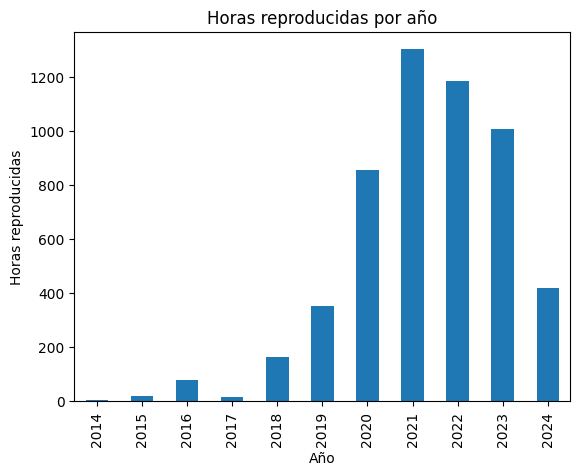

In [158]:
plays_per_year.plot(kind='bar', title='Horas reproducidas por año')
plt.xlabel('Año')
plt.ylabel('Horas reproducidas')
plt.show()

<hr/>

In [159]:
# Revisar mi comportamiento del 2024 👎
plays_per_month = songs_data[songs_data["year"] == 2024].groupby("month")["hours_played"].sum()
plays_per_month

,hours_played
month,
1,54.204367
2,60.557659
3,61.972216
4,71.431924
5,35.058000
6,27.732016
7,27.364658
8,65.948956
9,16.483666


Obviamente abril es mi top y que escuché...

In [160]:
# Filtrar solo los datos para marzo del año 2024
songs_2024 = songs_data[(songs_data["year"] == 2024) & (songs_data["month"] == 3)]
songs_2024.groupby(["master_metadata_album_artist_name", "master_metadata_track_name"])["hours_played"].sum().sort_values(ascending=False).head(10)

,,hours_played
master_metadata_album_artist_name,master_metadata_track_name,
The 1975,Fallingforyou,1.108767
TV Girl,Lovers Rock,0.832058
Ed Sheeran,Kiss Me,0.780151
Yellow Days,Gap in the Clouds,0.775316
Coldplay,Magic,0.767742
One Direction,Truly Madly Deeply,0.685378
Stan Getz,Corcovado (Quiet Nights Of Quiet Stars),0.671751
L8LOOMER,Right Side (Feat. Doja Cat),0.536671
Generación,Regalo de Amor (En Vivo),0.490059


F